In [2]:
import numpy as np
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

range of data, summary statistics for normal set vs aml set. pt by pt or average of all patients in set? I think AML pts should be pt by pt at least. can put in a dataframe and compare against the entire normal set. can possibly identify outliers this way (if the summary stats are the same and the prediction was incorrect, that might explain why)
done with median and standard deviations, maybe interquartile range and skewness. possibly too many stats? done for every marker in every tube, would be 4 * 7 + 4 * 4 * 6 = 124 stats per patient. 43 AML + 1 superset of normals.

Repeat for log of data?

Is there a way to measure cluster statistics for high dimension data?






In [29]:
np.arange(.7,1.0,.05)

array([ 0.7 ,  0.75,  0.8 ,  0.85,  0.9 ,  0.95,  1.  ])

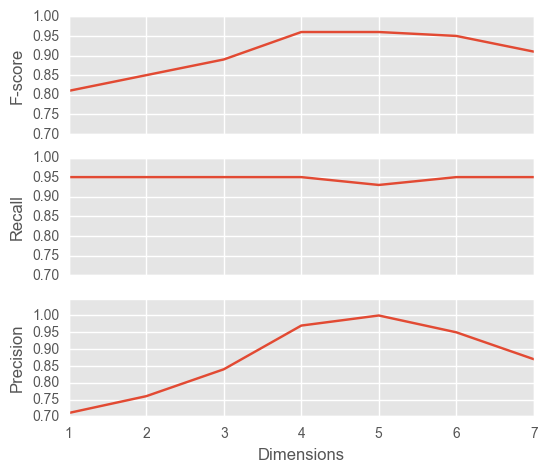

In [32]:
plt.style.use('ggplot')

f, axarr = plt.subplots(3,sharex=True)
axarr[0].plot(temp[[0]],temp[[1]])
axarr[1].plot(temp[[0]],temp[[2]])
axarr[2].plot(temp[[0]],temp[[3]])
plt.yticks(np.arange(.7,1.0,.05))

axarr[0].set_xlim(1,7)
axarr[0].set_ylim(.7, 1.0)
axarr[1].set_ylim(.7, 1.0)
axarr[2].set_ylim(.7, 1.05)
plt.yticks(np.arange(.7,1.0,.05))

axarr[0].set_ylabel('F-score')
axarr[1].set_ylabel('Recall')
axarr[2].set_ylabel('Precision')
axarr[2].set_xlabel('Dimensions')
plt.yticks(np.arange(.7,1.0,.05))
f.subplots_adjust(bottom=0)
f.subplots_adjust(top=1)

<Container object of 9 artists>

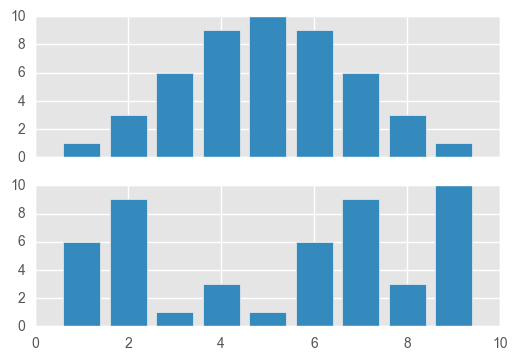

In [40]:
x = [1,2,3,4,5,6,7,8,9]
y = [1,3,6,9,10,9,6,3,1]
y2 = [6,9,1,3,1,6,9,3,10]
plt.style.use('ggplot')
f, axarr = plt.subplots(2,sharex=True)
axarr[0].bar(x,y,align='center')
axarr[1].bar(x,y2,align='center')

In [5]:
temp = pd.read_csv('C:\\python27\\chart.csv')
temp

,Dimensions,F-score,Recall,Precision,True positive,False positive,False negative,FN cases
0,1,0.81,0.95,0.71,41,17,2,"7, 116"
1,2,0.85,0.95,0.76,41,13,2,"7, 116"
2,3,0.89,0.95,0.84,41,8,2,"7, 116"
3,4,0.96,0.95,0.97,41,1,2,"7, 116"
4,5,0.96,0.93,1.00,40,0,3,"7, 101, 116"
5,6,0.95,0.95,0.95,41,2,2,"7, 116"
6,7,0.91,0.95,0.87,41,6,2,"7, 116"


In [2]:
import scipy
import scipy.cluster.vq
import scipy.spatial.distance
dst = scipy.spatial.distance.euclidean

def gap(data, refs=None, nrefs=20, ks=range(1,11)):
    """
    Compute the Gap statistic for an nxm dataset in data.
    Either give a precomputed set of reference distributions in refs as an (n,m,k) scipy array,
    or state the number k of reference distributions in nrefs for automatic generation with a
    uniformed distribution within the bounding box of data.
    Give the list of k-values for which you want to compute the statistic in ks.
    """
    shape = data.shape
    if refs==None:
        tops = data.max(axis=0)
        bots = data.min(axis=0)
        dists = scipy.matrix(scipy.diag(tops-bots))

        rands = scipy.random.random_sample(size=(shape[0],shape[1],nrefs))
        for i in range(nrefs):
            rands[:,:,i] = rands[:,:,i]*dists+bots
    else:
        rands = refs
    
    gaps = scipy.zeros((len(ks),))
    for (i,k) in enumerate(ks):
        (kmc,kml) = scipy.cluster.vq.kmeans2(data, k)
        disp = sum([dst(data[m,:],kmc[kml[m],:]) for m in range(shape[0])])
        refdisps = scipy.zeros((rands.shape[2],))
        for j in range(rands.shape[2]):
            (kmc,kml) = scipy.cluster.vq.kmeans2(rands[:,:,j], k)
            refdisps[j] = sum([dst(rands[m,:,j],kmc[kml[m],:]) for m in range(shape[0])])
        gaps[i] = scipy.mean(scipy.log(refdisps))-scipy.log(disp)
    return gaps

In [3]:
import numpy as np

In [11]:
data = np.genfromtxt('C:\\python27\\FCS\\1.csv',delimiter=',')[1:,:]
gap(data,nrefs=20,ks=[10000])

array([ 2.76815608])

In [12]:
data = np.genfromtxt('C:\\python27\\FCS\\1.csv',delimiter=',')[1:,:]
gap(data,nrefs=20,ks=[2000])

array([ 2.70858097])

In [13]:
data = np.genfromtxt('C:\\python27\\FCS\\1.csv',delimiter=',')[1:,:]
gap(data,nrefs=20,ks=[1000])

array([ 2.6755459])

In [14]:
data = np.genfromtxt('C:\\python27\\FCS\\1.csv',delimiter=',')[1:,:]
gap(data,nrefs=20,ks=[300])

array([ 2.5573379])

In [15]:
data = np.genfromtxt('C:\\python27\\FCS\\1.csv',delimiter=',')[1:,:2]
gap(data,nrefs=20,ks=[1,10,100,1000])

array([ 1.30989885,  1.64045801,  1.63691428,  1.48674602])

In [19]:
data = np.genfromtxt('C:\\python27\\FCS\\1.csv',delimiter=',')[1:,:2]
gap(data,nrefs=20,ks=[1,2,3,4,5,6])

array([ 1.30975998,  1.50798244,  1.56451211,  1.47114098,  1.64766654,
        1.67348645])

In [21]:
data = np.genfromtxt('C:\\python27\\FCS\\33.csv',delimiter=',')[1:,:2]
gap(data,nrefs=20,ks=[4,5,6,7,8])

array([ 1.54195573,  1.52983299,  1.58080017,  1.53896627,  1.60555368])

Some initial exploration of what the data actually looks like. First plot is FSC/SSC. Taking the log data makes it look pretty similar to what I'm familiar with. Log transformation is common in the biological domain.

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
data = np.genfromtxt('C:\\python27\\FCS\\1.csv',delimiter=',',usecols=(0,1),skip_header=1)
#data = np.log10(data)

(0, 50)

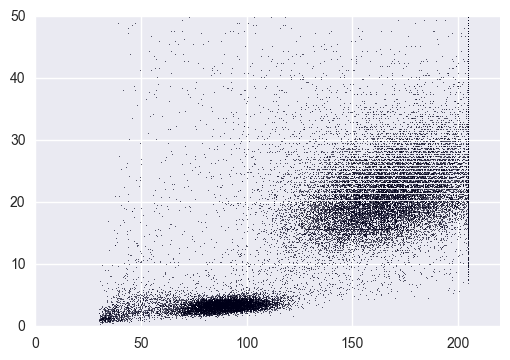

In [25]:
plt.scatter(data[:,0],data[:,1], s=.1)
plt.xlim(0,220)
plt.ylim(0,50)

Vs data from a known positive case

(0, 2)

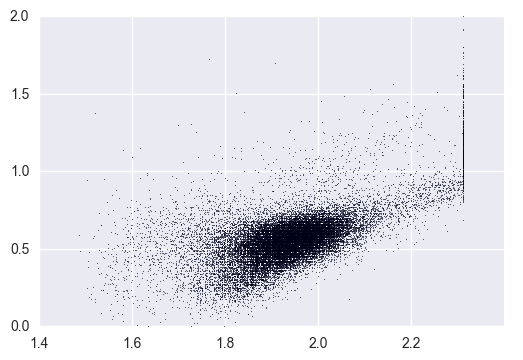

In [16]:
data = np.genfromtxt('C:\\python27\\FCS\\65.csv',delimiter=',',usecols=(0,1),skip_header=1)
plt.scatter(np.log10(data[:,0]),np.log10(data[:,1]), s=.1)
plt.xlim(1.4,2.4)
plt.ylim(0,2)

Same positive case, different markers

(-1, 2.5)

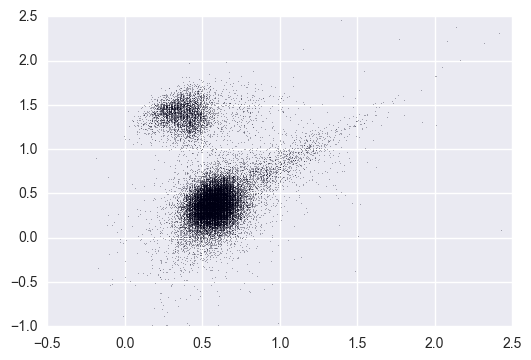

In [17]:
data = np.genfromtxt('C:\\python27\\FCS\\65.csv',delimiter=',',usecols=(1,4),skip_header=1)
plt.scatter(np.log10(data[:,0]),np.log10(data[:,1]), s=.1,marker='.')
plt.xlim(-.5,2.5)
plt.ylim(-1,2.5)